In [1]:
import os
import numpy as np
# emanu 
import emanu.hades.readsnap as RS
from emanu.hades import readfof
from emanu.hades import data as hadesData
from emanu import forwardmodel as FM 

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [2]:
%timeit RS.read_gadget_header('/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1/snapdir_004/snap_004')

The slowest run took 11.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 70.5 µs per loop


In [3]:
%timeit readfof.FoF_catalog('/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1', 4, long_ids=False, swap=False, SFR=False)

10 loops, best of 3: 96.1 ms per loop


In [4]:
%timeit hadesData.hadesMnuHalos(0., 1, 4, mh_min=3200., dir='/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1')

1 loop, best of 3: 1.35 s per loop


In [5]:
halos = hadesData.hadesMnuHalos(0., 1, 4, mh_min=3200., dir='/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1')

In [41]:
%timeit FM.hodGalaxies(halos, {'logMmin': 13.5, 'sigma_logM': 0.58, 'logM0': 12.59, 'alpha':1.24, 'logM1': 14.55})

1 loop, best of 3: 638 ms per loop


In [43]:
hod = FM.hodGalaxies(halos, {'logMmin': 13.5, 'sigma_logM': 0.58, 'logM0': 12.59, 'alpha':1.24, 'logM1': 14.55})

In [44]:
%timeit hod.repopulate(10)

1 loop, best of 3: 190 ms per loop


In [40]:
print(np.array(hod['x']))

[254.06265  503.42038   79.560455 ... 998.4629   965.8028   989.89465 ]


In [46]:
zslice = (np.array(hod['halo_z']) < 50.)
print np.sum(zslice)

6736


(15.0, 30.0)

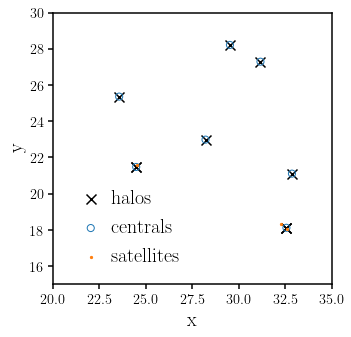

In [77]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
sub.scatter(np.array(hod['halo_x'])[zslice], np.array(hod['halo_y'])[zslice], c='k', s=100, marker='x', label='halos')
centrals = (np.array(hod['gal_type']) == 0) & zslice
sub.scatter(np.array(hod['x'])[centrals], np.array(hod['y'])[centrals], 
            edgecolors='C0', facecolors='none', s=50, label='centrals')
satellites = (np.array(hod['gal_type']) == 1) & zslice
sub.scatter(np.array(hod['x'])[satellites], np.array(hod['y'])[satellites], c='C1', s=5, label='satellites')
sub.legend(loc='lower left', handletextpad=0, fontsize=20)
sub.set_xlabel('x', fontsize=20)
sub.set_xlim(20., 35.)
sub.set_ylabel('y', fontsize=20)
sub.set_ylim(15., 30.)